In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_G9_new_15.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No
7043,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,NaN,...,No,No,No,No,One year,No,Mailed check,49.55,475.7,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No


# Exploratory Data Analysis and Feature Selection

In [3]:
#Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [4]:
# Selecting all object datatypes
cat=df.select_dtypes(object)

In [5]:
cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes
7042,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),6844.5,No
7043,8865-TNMNX,Male,Yes,Yes,Yes,No,DSL,NaN,Yes,No,No,No,No,One year,No,Mailed check,475.7,No
7044,9489-DEDVP,Female,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),4872.35,No


In [6]:
#Selecting Numeric datatypes
Numeric = df.select_dtypes(["int64","float64"])

In [7]:
Numeric

,SeniorCitizen,tenure,MonthlyCharges
0,0,1.0,29.85
1,0,34.0,56.95
2,0,2.0,53.85
3,0,45.0,42.30
4,0,2.0,70.70
...,...,...,...
7041,1,4.0,74.40
7042,0,66.0,105.65
7043,0,10.0,49.55
7044,0,70.0,69.20


In [8]:
#Converting all string values to numeric values
for col in cat:
    le = LabelEncoder()
    cat[col] = le.fit_transform(cat[col])

In [9]:
cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1
7042,2226,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,5407,0
7043,6263,1,1,1,1,0,0,3,2,0,0,0,0,1,0,3,4024,0
7044,6671,0,1,1,1,2,0,2,2,0,0,2,0,2,1,1,4118,0


In [10]:
#Joining the 2 dataframes(cat & Numeric) into 1 DataFrame
data =pd.concat([Numeric,cat], axis=1)

In [11]:
#New DataFrame 
data

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1.0,29.85,5375,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,2505,0
1,0,34.0,56.95,3962,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,1466,0
2,0,2.0,53.85,2564,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,157,1
3,0,45.0,42.30,5535,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,1400,0
4,0,2.0,70.70,6511,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,1,4.0,74.40,5934,1,1,0,1,2,1,...,0,0,0,0,0,0,1,3,2660,1
7042,0,66.0,105.65,2226,1,0,0,1,0,1,...,0,2,2,2,2,2,1,0,5407,0
7043,0,10.0,49.55,6263,1,1,1,1,0,0,...,2,0,0,0,0,1,0,3,4024,0
7044,0,70.0,69.20,6671,0,1,1,1,2,0,...,2,0,0,2,0,2,1,1,4118,0


In [12]:
data.shape

(7046, 21)

In [13]:
#Checking for null values in the DataFrame
data.isna().sum().sum()

23

In [14]:
#Summary of null values in each column
data.isna().sum()

SeniorCitizen        0
tenure              18
MonthlyCharges       5
customerID           0
gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges         0
Churn                0
dtype: int64

In [15]:
# Remove null values permanently
data.dropna(axis =1, inplace=True)

In [16]:
# No Null values in DataFrame
data.isna().sum()

SeniorCitizen       0
customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data

,SeniorCitizen,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,0,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,0,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,0,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,1,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1
7042,0,2226,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,5407,0
7043,0,6263,1,1,1,1,0,0,3,2,0,0,0,0,1,0,3,4024,0
7044,0,6671,0,1,1,1,2,0,2,2,0,0,2,0,2,1,1,4118,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     7046 non-null   int64
 1   customerID        7046 non-null   int32
 2   gender            7046 non-null   int32
 3   Partner           7046 non-null   int32
 4   Dependents        7046 non-null   int32
 5   PhoneService      7046 non-null   int32
 6   MultipleLines     7046 non-null   int32
 7   InternetService   7046 non-null   int32
 8   OnlineSecurity    7046 non-null   int32
 9   OnlineBackup      7046 non-null   int32
 10  DeviceProtection  7046 non-null   int32
 11  TechSupport       7046 non-null   int32
 12  StreamingTV       7046 non-null   int32
 13  StreamingMovies   7046 non-null   int32
 14  Contract          7046 non-null   int32
 15  PaperlessBilling  7046 non-null   int32
 16  PaymentMethod     7046 non-null   int32
 17  TotalCharges      7046 non-null  

In [19]:
data.describe()

,SeniorCitizen,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7046.000000,7046.00000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000
mean,0.162078,3522.32373,0.504684,0.483253,0.299886,0.903207,0.940392,0.872836,0.802015,0.906756,0.904201,0.796906,0.985382,0.992194,0.690747,0.592109,1.574652,3258.069543,0.265257
std,0.368548,2033.87051,0.500014,0.499755,0.458241,0.295696,0.948568,0.737908,0.869547,0.880169,0.879894,0.861475,0.884974,0.885060,0.833740,0.491478,1.068169,1888.344885,0.441501
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1761.25000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1609.000000,0.000000
50%,0.000000,3522.50000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3250.500000,0.000000
75%,0.000000,5283.75000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4900.750000,1.000000
max,1.000000,7042.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,6530.000000,1.000000


In [20]:
data.corr()

,SeniorCitizen,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
SeniorCitizen,1.000000,-0.002360,-0.001809,0.016281,-0.211358,0.008515,0.146200,-0.032245,-0.124862,-0.013790,-0.021272,-0.151142,0.030766,0.047395,-0.142665,0.156582,-0.038672,0.037586,0.150984
customerID,-0.002360,1.000000,0.006009,-0.026037,-0.011816,-0.006267,0.004131,-0.012516,0.016779,-0.002795,-0.007310,0.000815,-0.007729,-0.017194,0.015522,-0.002280,0.012052,0.003243,-0.017828
gender,-0.001809,0.006009,1.000000,-0.001958,0.010286,-0.006534,-0.006893,-0.001079,-0.014354,-0.012070,0.000536,-0.006854,-0.006742,-0.008738,-0.000100,-0.011864,0.017417,-0.005322,-0.008522
Partner,0.016281,-0.026037,-0.001958,1.000000,0.453021,0.017845,0.142218,0.000768,0.147686,0.153442,0.165982,0.126452,0.137293,0.129193,0.295021,-0.015101,-0.154407,0.059703,-0.150666
Dependents,-0.211358,-0.011816,0.010286,0.453021,1.000000,-0.001548,-0.025160,0.044370,0.151164,0.091511,0.080063,0.133090,0.046864,0.020822,0.243521,-0.111636,-0.039799,-0.009344,-0.164518
PhoneService,0.008515,-0.006267,-0.006534,0.017845,-0.001548,1.000000,-0.020573,0.387247,-0.025409,0.024219,0.003636,-0.019230,0.055344,0.043757,0.002354,0.016427,-0.004084,0.083239,0.011857
MultipleLines,0.146200,0.004131,-0.006893,0.142218,-0.025160,-0.020573,1.000000,-0.109387,0.003587,0.117282,0.122238,0.011412,0.175324,0.180862,0.110940,0.165537,-0.177166,0.114917,0.038099
InternetService,-0.032245,-0.012516,-0.001079,0.000768,0.044370,0.387247,-0.109387,1.000000,-0.044331,0.035723,0.045290,-0.025672,0.107356,0.098675,0.099420,-0.138737,0.086241,-0.055811,-0.047199
OnlineSecurity,-0.124862,0.016779,-0.014354,0.147686,0.151164,-0.025409,0.003587,-0.044331,1.000000,0.185636,0.166480,0.275836,0.035897,0.047606,0.366051,-0.159098,-0.096333,0.044117,-0.285425
OnlineBackup,-0.013790,-0.002795,-0.012070,0.153442,0.091511,0.024219,0.117282,0.035723,0.185636,1.000000,0.187326,0.195358,0.147133,0.136272,0.281212,-0.013448,-0.124625,0.090888,-0.195688


# Part 1

In [21]:
#The task to be performed according to the Dataset will be classification alogorithm as the dependent variable Chun has an out of 1 or 0 which discrete.

# Splitting Data into Training and Testing Dataset


In [22]:
x = data.iloc[:,0:17]

In [23]:
y = data.iloc[:, -1]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5636, 17)
(5636,)
(1410, 17)
(1410,)


# Building of Model using Training dataset

In [26]:
# The dataset is of a classification and there for we shall use logistic Regression for Categorical data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making Predictions with Our Model


In [28]:
y_pred = lr.predict(x_test)

In [29]:
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test)

Predicted Values:
[0 0 1 ... 0 0 1]
Actual Values:
3816    0
3514    0
5301    1
3745    1
2358    0
       ..
4154    1
3920    0
4640    1
6915    0
2570    1
Name: Churn, Length: 1410, dtype: int32


In [30]:
# Use of confusion matrix to see proportion of the accuracy od data between y_test and y_pred
# Evaluation Metrics:
# The classificcation report for the testing dataset shows an accuracy of 0.80 which gives confidence that the data that is tested is not far out from the training data
#  For customers that are churn precision is seen to be the highest score
# For customers that are not churn recall is seen to be the highest score 

# TP = 932
# TN = 190
# Both above are true predictions

# FP = 112
# FN = 176
# Both of the above are false predictions

cf = confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

[[932 112]
 [176 190]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1044
           1       0.63      0.52      0.57       366

    accuracy                           0.80      1410
   macro avg       0.74      0.71      0.72      1410
weighted avg       0.79      0.80      0.79      1410



In [31]:
y_train_pred = lr.predict(x_train)

In [32]:
y_train_pred

array([1, 1, 0, ..., 1, 1, 0])

In [33]:
print("Classification Report for Training Dataset:")
print(classification_report(y_train,y_train_pred))

Classification Report for Training Dataset:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4133
           1       0.60      0.47      0.52      1503

    accuracy                           0.77      5636
   macro avg       0.71      0.68      0.69      5636
weighted avg       0.76      0.77      0.76      5636



<AxesSubplot:>

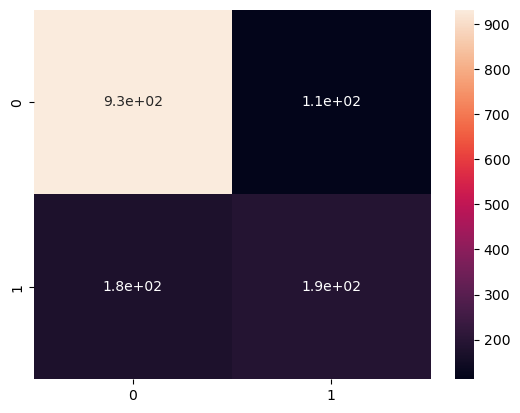

In [34]:
cf =confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

In [35]:
print(lr.intercept_)

[-0.16329611]


In [36]:
print(lr.coef_)

[[ 2.14339705e-01 -2.02209126e-05 -7.18305844e-02 -1.62780110e-01
  -2.78537415e-01 -3.64098185e-03  1.61834479e-01  7.90029405e-03
  -3.63599135e-01 -2.40011559e-01 -1.17611663e-01 -3.38902119e-01
   9.19542082e-02  1.08983200e-01 -1.22310474e+00  4.02585301e-01
   3.24900446e-02]]


# Model Evaluation Metrics

In [37]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 0.20425531914893616


In [38]:
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error 0.20425531914893616


In [39]:
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 0.45194614629282565


# R-Squared

In [40]:
train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)
print("The train score for lr model is: ", train_score_lr)
print("The test score for lr model is: ",test_score_lr)

The train score for lr model is:  0.7734208658623137
The test score for lr model is:  0.7957446808510639


In [41]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: -0.06274731486714602


# Part 2

# Model Building

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Extract Features(x varaible from dataFrame)


In [43]:
x = data.iloc[:,:17]

# Extract Dependent varaible(y varaible from dataFrame)

In [44]:
y = data.iloc[:, -1]

# feauture Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x = st_x.fit_transform(x)

In [46]:
models=[]
scores=[]
Best_parameters=[]

# Hyperparemeter Tunning for all Models using GridSearchCV

# GridSearchCV- LogisticRegression

In [47]:
parameters = {'penalty': ['l1','l2']}
c1 = LogisticRegression()
grid = GridSearchCV(c1, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c1)
scores.append(grid.best_score_)
Best_parameters.append(grid.best_params_)

{'penalty': 'l2'}
LogisticRegression()
0.7751918117343649


C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

# GridSearchCV - DecisionTreeClassifier

In [48]:
parameters = {'criterion':['gini','entropy'],
              'splitter' :['best','random']}
        
        
c2 = DecisionTreeClassifier()
grid = GridSearchCV(c2, parameters, cv =10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c2)
scores.append(grid.best_score_)
Best_parameters.append(grid.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy')
0.7079184800128949


# GridSearchCV - Support Vector Classifier(SVC)

In [49]:
parameters = {'C': [0.01,0.05],
             'degree': [2, 3],
            'gamma': [0.001,0.01],
             'kernel': ['rbf']
             }

c3 = SVC()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c3)
scores.append(grid.best_score_)
Best_parameters.append(grid.best_params_)

{'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=0.01, degree=2, gamma=0.001)
0.7347431092843326


# GridSearchCV - KNeighborsClassfier(KNN)

In [50]:
parameters ={'n_neighbors': range(30),
            'metric': ['manhattan','euclidean']
            }

c4 = KNeighborsClassifier()
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c4)
scores.append(grid.best_score_)
Best_parameters.append(grid.best_params_)

C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'metric': 'manhattan', 'n_neighbors': 22}
KNeighborsClassifier(metric='manhattan', n_neighbors=22)
0.7713565844616377


C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits f

# GridSearchCV - RandomForestClassifier

In [51]:
parameters = {'n_estimators': range(20),
             'criterion': ['gini','entropy']}

c5 = RandomForestClassifier()
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c5)
scores.append(grid.best_score_)
Best_parameters.append(grid.best_params_)                          

{'criterion': 'entropy', 'n_estimators': 14}
RandomForestClassifier(criterion='entropy', n_estimators=14)
0.7573110090264346


C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Sivez\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than 

In [52]:
result_data = pd.DataFrame({"Models":models, "Score":scores,"Best_parameters":Best_parameters})

In [53]:
result_data

,Models,Score,Best_parameters
0,LogisticRegression(),0.775192,{'penalty': 'l2'}
1,DecisionTreeClassifier(),0.707918,"{'criterion': 'entropy', 'splitter': 'best'}"
2,SVC(),0.734743,"{'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kern..."
3,KNeighborsClassifier(),0.771357,"{'metric': 'manhattan', 'n_neighbors': 22}"
4,RandomForestClassifier(),0.757311,"{'criterion': 'entropy', 'n_estimators': 14}"


# Conclusion

In [54]:
# All the models from GridSearch CV produced good scores(as i believe anything above >70) is data that can be used as the level of accuracy is high
# From the hyperparameter tunning used for GridSearch CV Logistic regression produced the highest score although it had choose 1 parameter for the model
# When it comes to parameters SCV() model appears to have choosen a number of parameters that best defines the model whereas the score is the lowest among the other models
# I will conclude and say its best to choose a model based on what parameters are choosen by the model and 2ndly focus on the score of the model
